## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hgrp_functions as imh
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Objective 1 - Profile and Explore the data

In [2]:
churn_raw = pd.read_csv("Bank_Churn.csv")
churn_raw.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
churn_raw.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


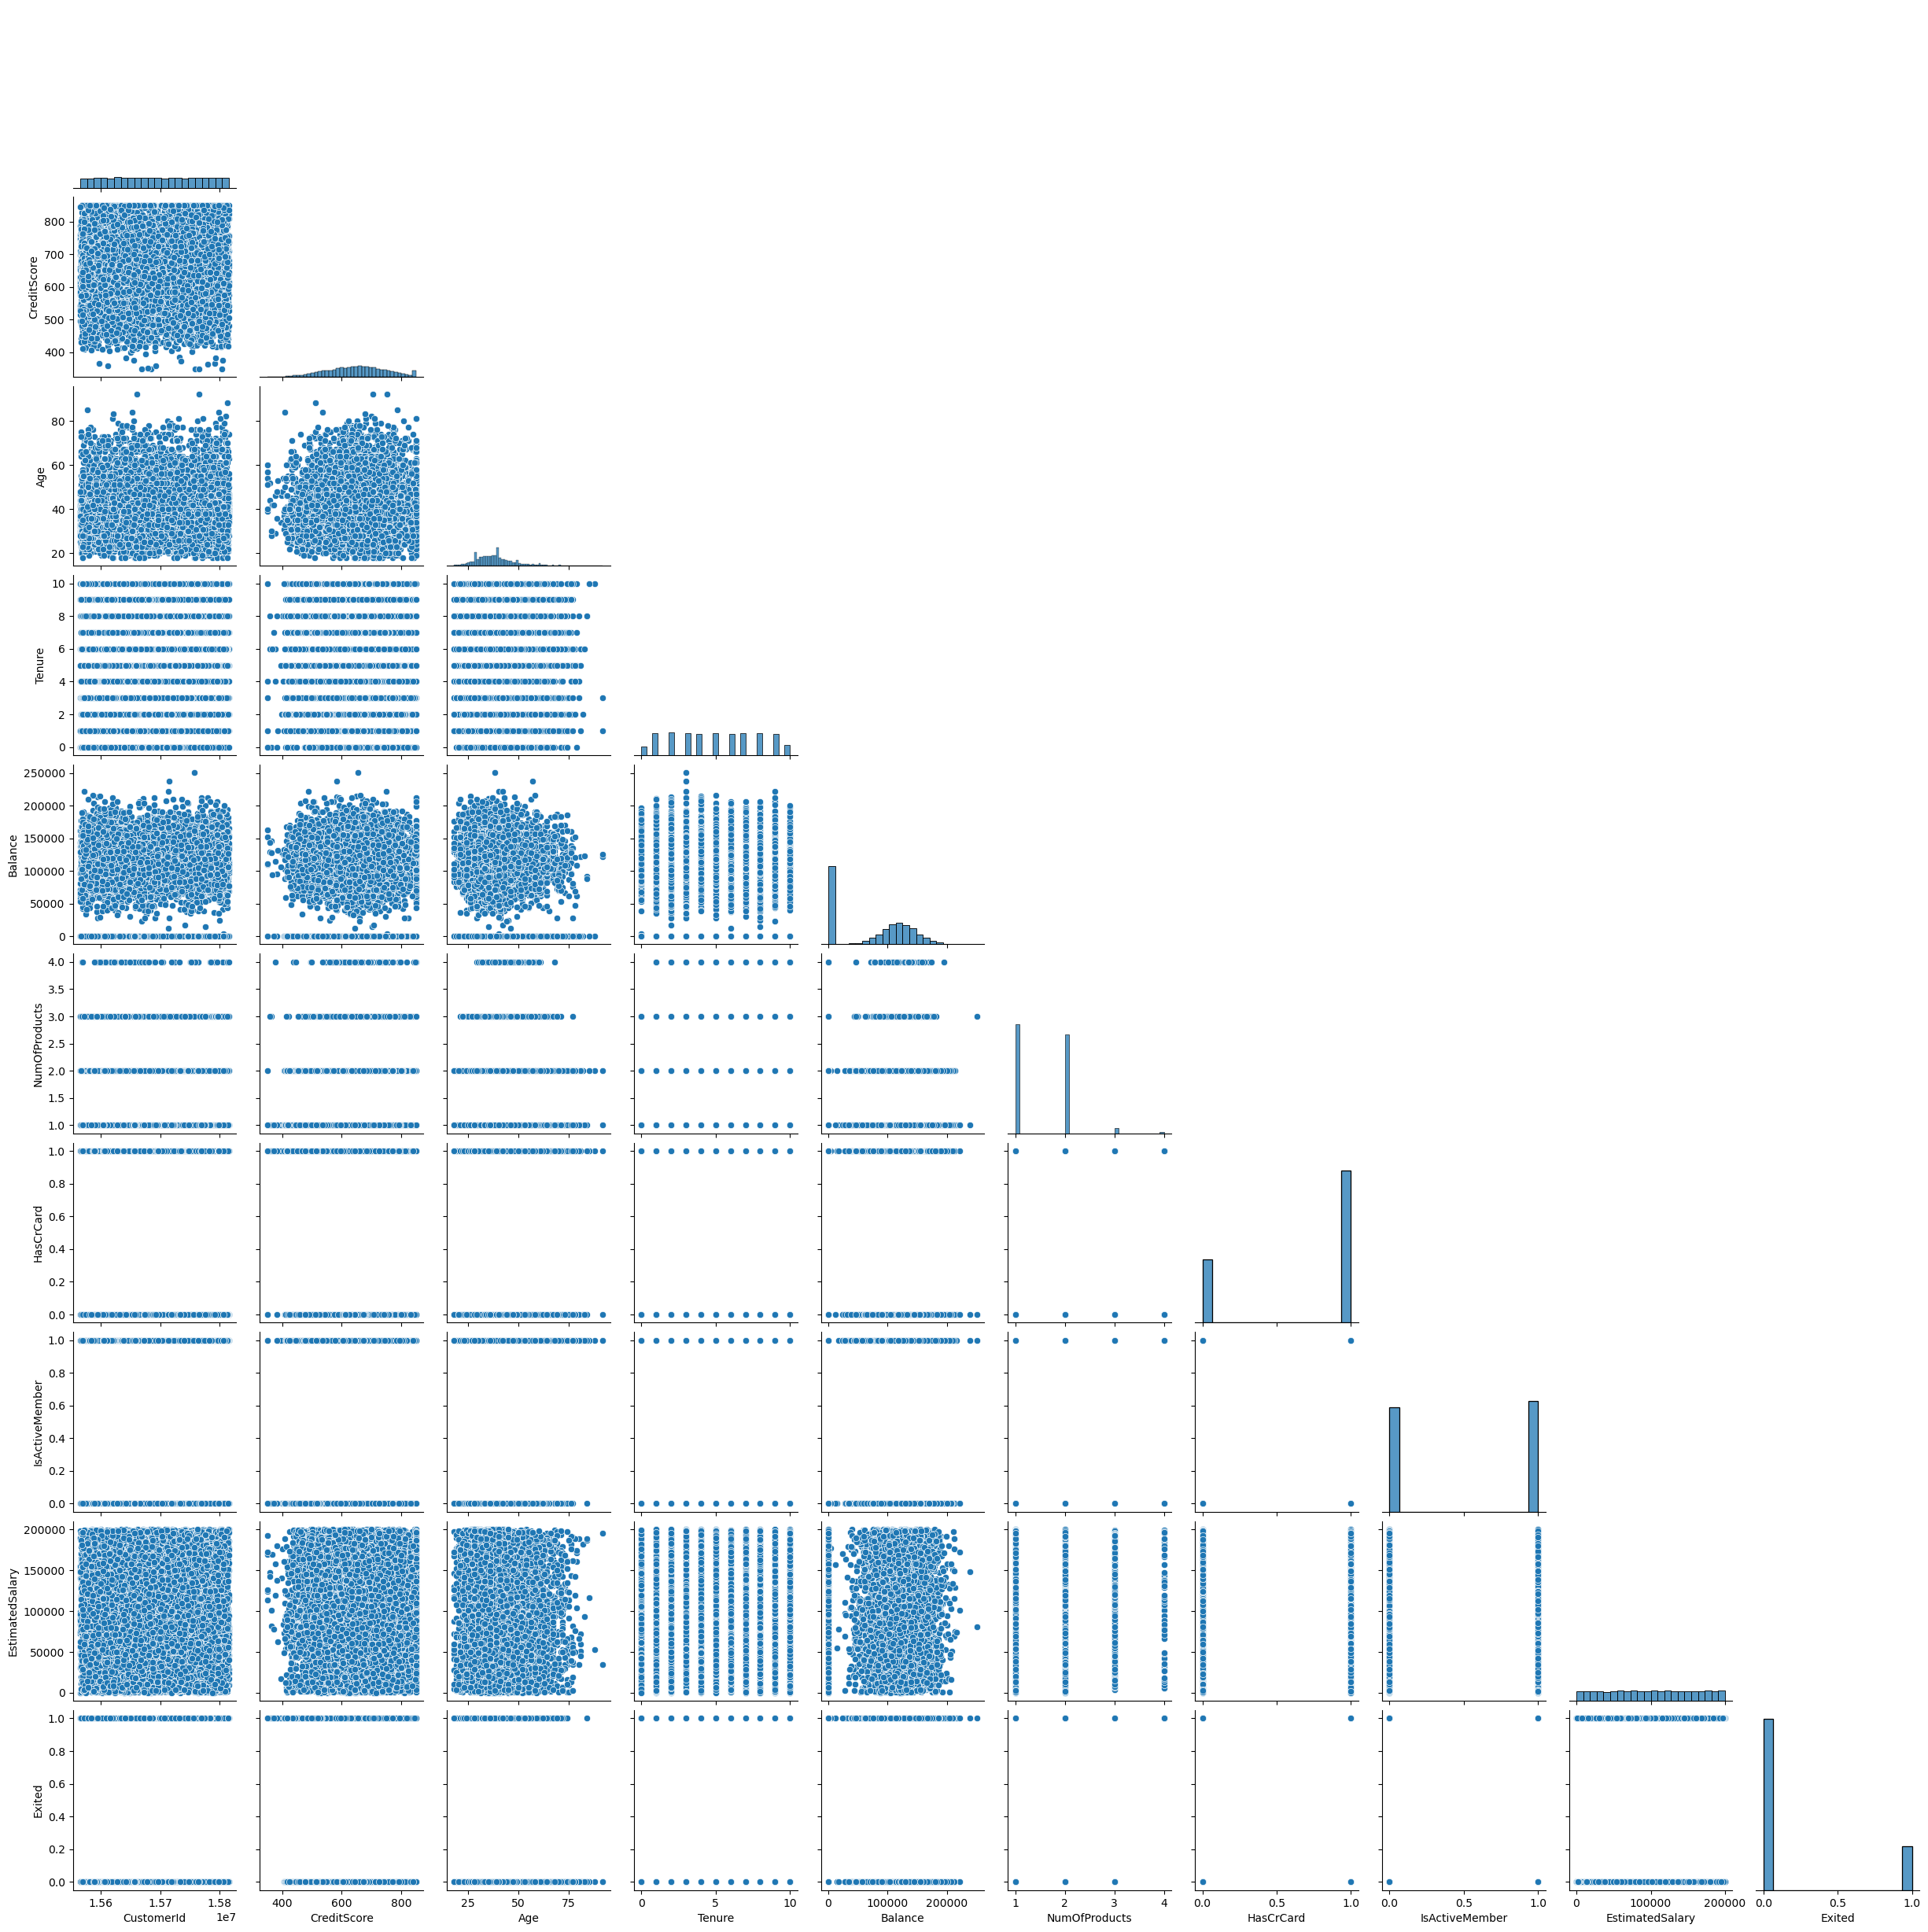

In [5]:
# Pairplot
sns.pairplot(data=churn_raw, corner=True);

Text(0.5, 1.0, 'Bank Churn Correlation Matrix Heat Map')

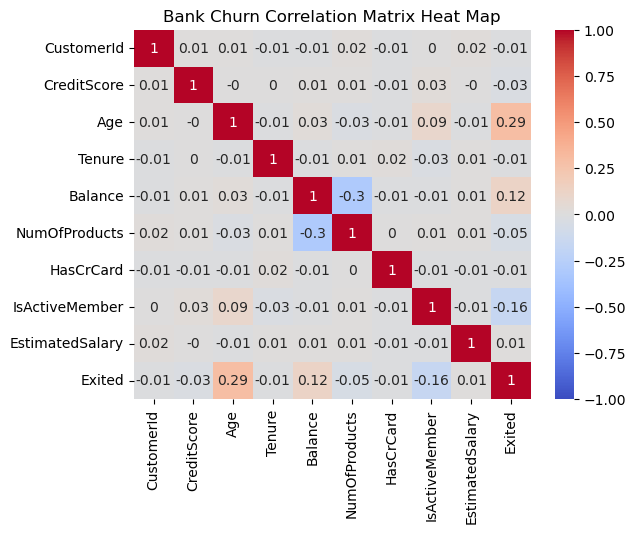

In [6]:
# Heatmap of numeric only feature correlations
sns.heatmap(churn_raw.corr(numeric_only=True).round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm");
plt.title("Bank Churn Correlation Matrix Heat Map")

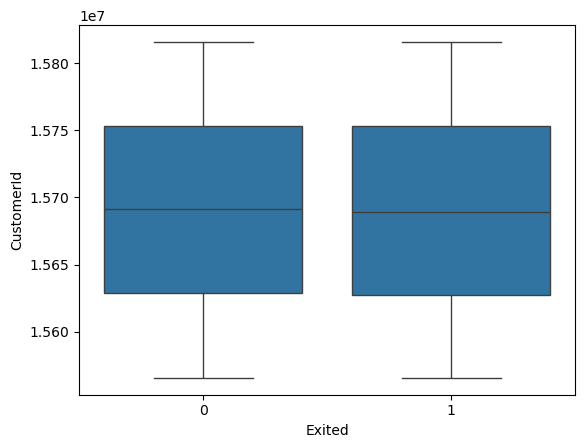

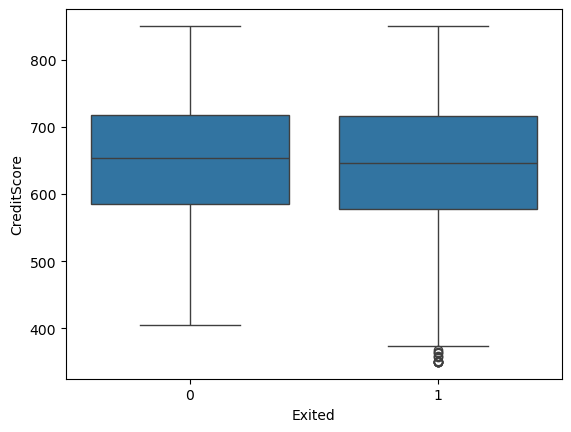

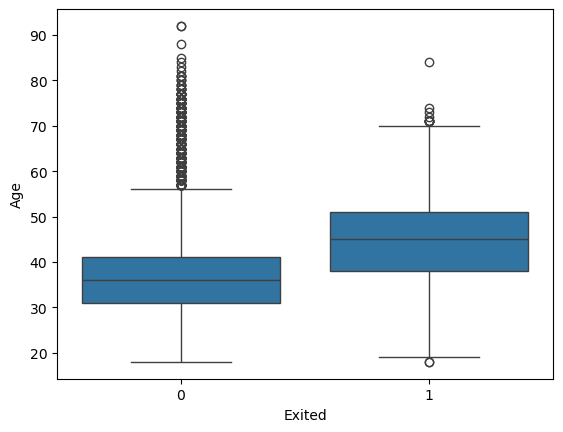

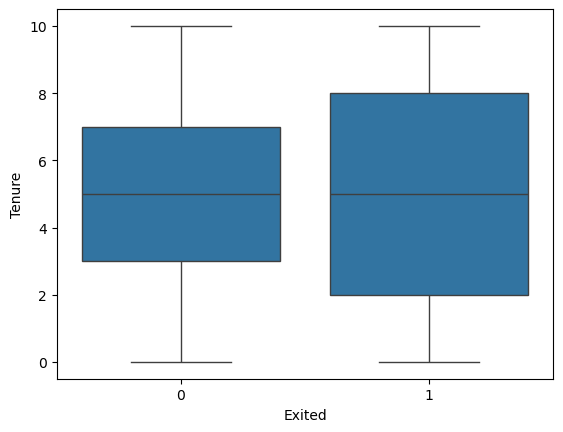

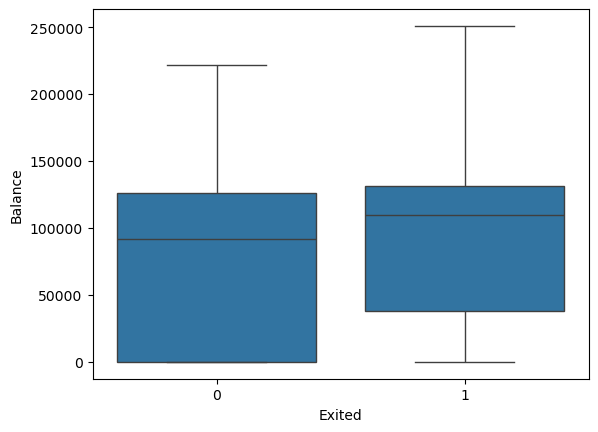

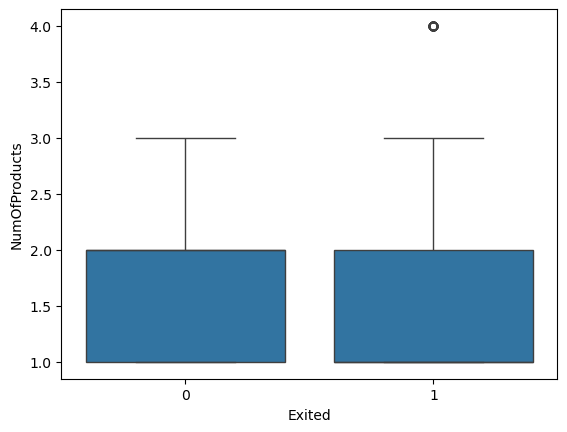

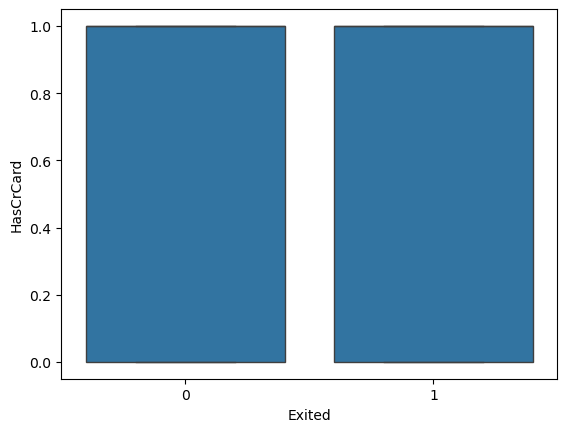

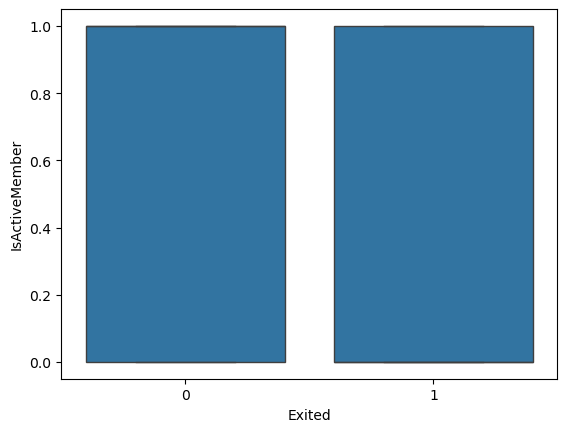

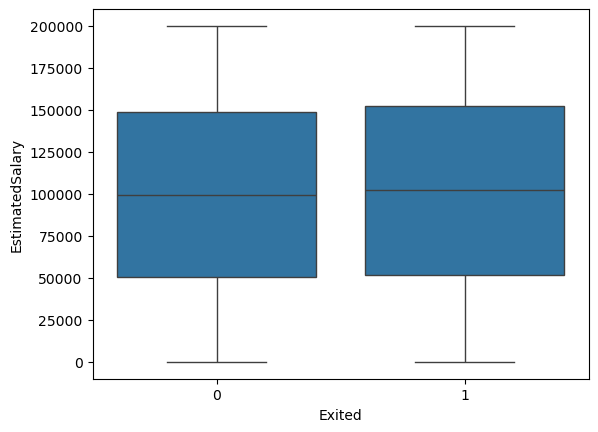

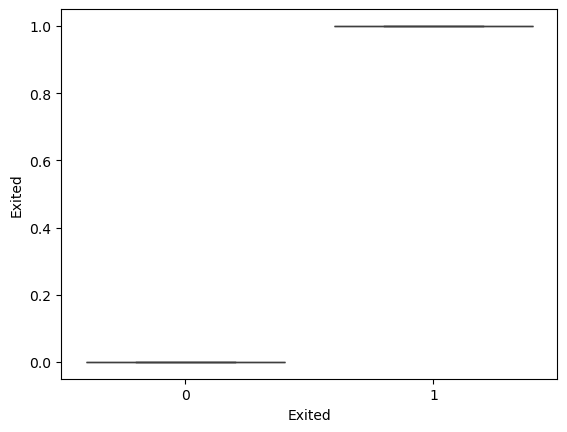

In [7]:
# Box plots of the numeric variables compared to the target variable to assess features to select for model
imh.box_target_plotter(churn_raw, "Exited")

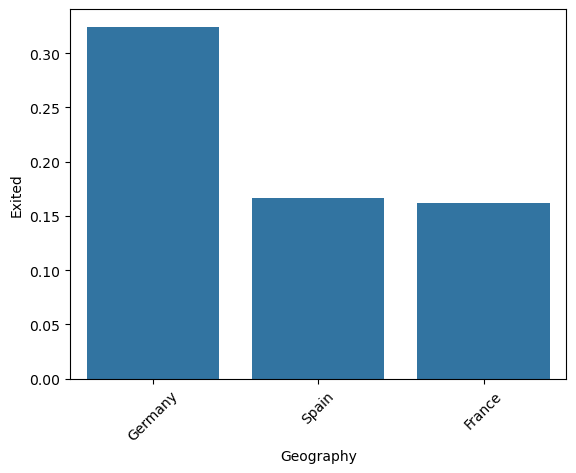

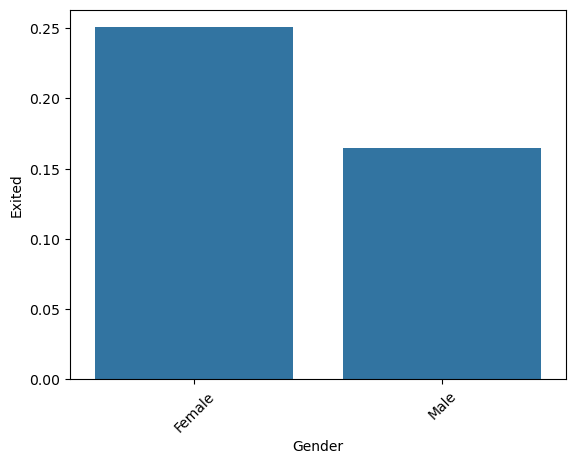

In [8]:
# Plot object data types against the target variable
imh.cat_plotter(churn_raw, "Exited", 1);

## Objective 2 - Prepare the data for modeling

In [9]:
churn_modeling_df = churn_raw.copy()
churn_modeling_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Verifying no NaN values in dataframe
churn_modeling_df[churn_modeling_df.isna().any(axis=1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
# Save the customerIds in a series in case we need later
customer_ids = churn_modeling_df["CustomerId"]
customer_ids

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

In [12]:
# Remove columns that will not be in the model
churn_modeling_df = churn_modeling_df.drop(["CustomerId", "Surname"], axis=1)
churn_modeling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Feature Engineering - Add two columns to the model
churn_modeling_df = churn_modeling_df.assign(
        balance_v_salary = churn_modeling_df["Balance"] / churn_modeling_df["EstimatedSalary"],
        income_v_products = churn_modeling_df["EstimatedSalary"] / churn_modeling_df["NumOfProducts"])

churn_modeling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_v_salary,income_v_products
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


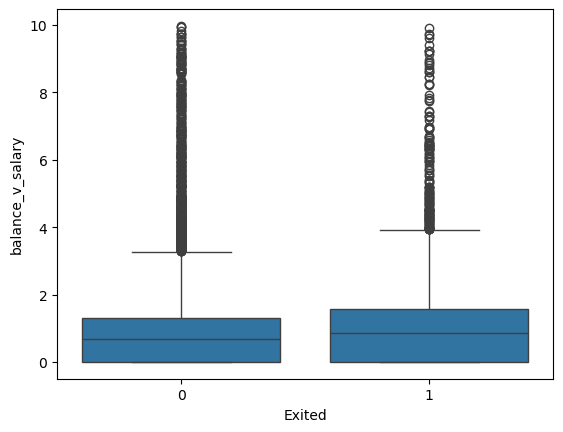

In [14]:
# Create box plots for the two features added to the model
sns.boxplot(churn_modeling_df.query("balance_v_salary < 10"), x="Exited", y= "balance_v_salary");

<Axes: xlabel='Exited', ylabel='income_v_products'>

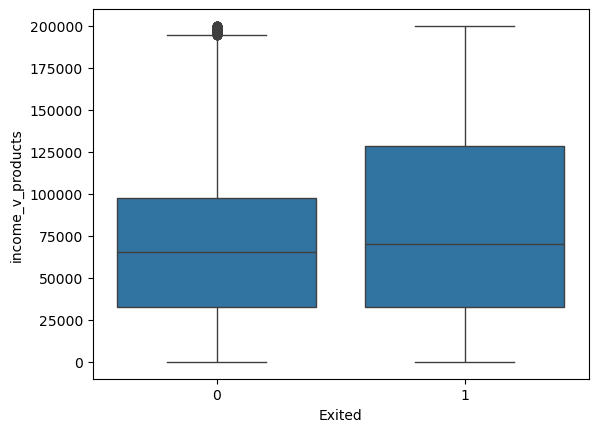

In [15]:
sns.boxplot(churn_modeling_df, x="Exited", y= "income_v_products")

In [16]:
# Look at the value counts for the Geography variable
churn_modeling_df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
# change Geography to a numeric field via dummy variables
churn_modeling_df = pd.get_dummies(churn_modeling_df, drop_first=True, dtype="int")
churn_modeling_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_v_salary,income_v_products,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0


In [18]:
# Split data into train and test

X = churn_modeling_df.drop("Exited", axis = 1)
y = churn_modeling_df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

## Objective 3 - Build and evaluate a logistic regression Model

In [19]:
# Create and fit the Logistic Regression model
logreg = LogisticRegression(solver="newton-cholesky")
lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy Score: {lr.score(X_train, y_train)}")

Train Accuracy Score: 0.817


In [20]:
# Create the confusion matrix for the model to setup model scoring
confusion_matrix(y_train, lr.predict(X_train))

array([[6119,  253],
       [1211,  417]], dtype=int64)

In [21]:
# Print the precision and recall scores for the logistic regression model
print(f"Train Precision Score: {precision_score(y_train, lr.predict(X_train))}")
print(f"Train Recall Score: {recall_score(y_train, lr.predict(X_train))}")

Train Precision Score: 0.6223880597014926
Train Recall Score: 0.25614250614250617


In [22]:
# List the coefficients by feature variable.  Determine features with the most influence on the model
list(zip(X_train, lr.coef_[0]))

[('CreditScore', -0.0009187111129064422),
 ('Age', 0.07348670677437191),
 ('Tenure', -0.015723073221588727),
 ('Balance', 2.1594952278198626e-06),
 ('NumOfProducts', 0.7986881910560668),
 ('HasCrCard', -0.11739952340062897),
 ('IsActiveMember', -1.0796835443611241),
 ('EstimatedSalary', -1.715376460983057e-05),
 ('balance_v_salary', 0.0005748891887945845),
 ('income_v_products', 2.2213179944336808e-05),
 ('Geography_Germany', 0.7955740153693516),
 ('Geography_Spain', 0.035513084515640635),
 ('Gender_Male', -0.4993144026831347)]

In [23]:
# Remove the Balance, EstimatedSalary and Income_v_Products columns from the model
X_train2 = X_train.drop(["Balance", "EstimatedSalary", "income_v_products"], axis=1)

In [24]:
# Re-run the model with the columns removed
logreg = LogisticRegression(solver="newton-cholesky")
lr = logreg.fit(X_train2, y_train)

print(f"Train Accuracy Score: {lr.score(X_train2, y_train)}")

Train Accuracy Score: 0.81425


In [25]:
# Re-run the confusion matrix to see if we have any improvement
confusion_matrix(y_train, lr.predict(X_train2))

array([[6146,  226],
       [1260,  368]], dtype=int64)

In [26]:
# Re-calculate the precision and recall scores
print(f"X-train2 Precision Score: {precision_score(y_train, lr.predict(X_train2))}")
print(f"X_train2 Recall Score: {recall_score(y_train, lr.predict(X_train2))}")

X-train2 Precision Score: 0.6195286195286195
X_train2 Recall Score: 0.22604422604422605


In [27]:
list(zip(X_train, lr.coef_[0]))

[('CreditScore', -0.0009371135937576711),
 ('Age', 0.07284400805908461),
 ('Tenure', -0.016896922981061074),
 ('Balance', -0.15018105697048634),
 ('NumOfProducts', -0.11697942397526294),
 ('HasCrCard', -1.086891705111629),
 ('IsActiveMember', 0.0006200078292914309),
 ('EstimatedSalary', 0.9271949001681894),
 ('balance_v_salary', 0.04444773415452998),
 ('income_v_products', -0.5084661826892121)]

In [28]:
#Re-run the original model
logreg = LogisticRegression(solver="newton-cholesky")
lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy Score: {lr.score(X_train, y_train)}")

Train Accuracy Score: 0.817


In [29]:
# Re-run the confusion matrix with the original model
confusion_matrix(y_train, lr.predict(X_train))

array([[6119,  253],
       [1211,  417]], dtype=int64)

In [30]:
# Re-run the precision and recall scores from the original model
print(f"Train Precision Score: {precision_score(y_train, lr.predict(X_train))}")
print(f"Train Recall Score: {recall_score(y_train, lr.predict(X_train))}")

Train Precision Score: 0.6223880597014926
Train Recall Score: 0.25614250614250617


In [31]:
# Re-list the coefficients for the original variables
list(zip(X_train, lr.coef_[0]))

[('CreditScore', -0.0009187111129064422),
 ('Age', 0.07348670677437191),
 ('Tenure', -0.015723073221588727),
 ('Balance', 2.1594952278198626e-06),
 ('NumOfProducts', 0.7986881910560668),
 ('HasCrCard', -0.11739952340062897),
 ('IsActiveMember', -1.0796835443611241),
 ('EstimatedSalary', -1.715376460983057e-05),
 ('balance_v_salary', 0.0005748891887945845),
 ('income_v_products', 2.2213179944336808e-05),
 ('Geography_Germany', 0.7955740153693516),
 ('Geography_Spain', 0.035513084515640635),
 ('Gender_Male', -0.4993144026831347)]

In [32]:
# Run the confusion matrix for the test data
confusion_matrix(y_test, lr.predict(X_test))

array([[1536,   55],
       [ 320,   89]], dtype=int64)

In [33]:
# Run the accuracy score for the test data
print(f"Test Accuracy Score: {lr.score(X_test, y_test)}")

Test Accuracy Score: 0.8125


In [34]:
# Run the precision and recall scores for the test data
print(f"Test Precision Score: {precision_score(y_test, lr.predict(X_test))}")
print(f"Test Recall Score: {recall_score(y_test, lr.predict(X_test))}")

Test Precision Score: 0.6180555555555556
Test Recall Score: 0.2176039119804401


In [35]:
# Run the F1 score for the test data
print(f"Test F1 Score: {f1_score(y_test, lr.predict(X_test))}")

Test F1 Score: 0.321880650994575


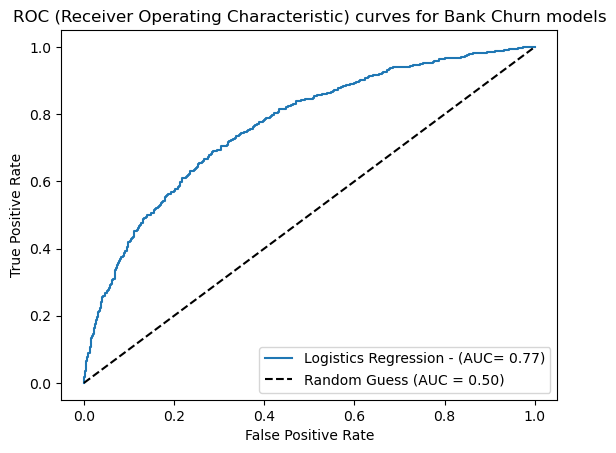

In [36]:
# Predict probabilities for the positive class
y_probs = lr.predict_proba(X_test)[:, 1]

# Calculate the ROC () curve
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under Curve)
auc_score1 = auc(fpr1, tpr1)

# Plot the AUC curve
plt.plot(fpr1, tpr1, label=f"Logistics Regression - (AUC= {auc_score1:.2f})")

# Draw random guess
plt.plot([0,1], [0,1], "k--", label="Random Guess (AUC = 0.50)")

# Format visual
plt.title("ROC (Receiver Operating Characteristic) curves for Bank Churn models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

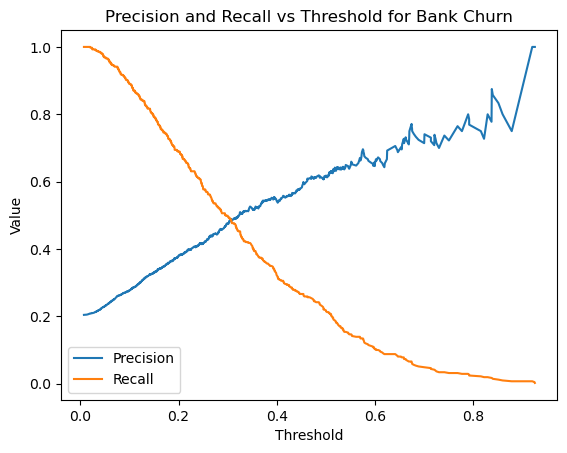

In [37]:
# Assuming lr is your trained logistic regression model and X_test, y_test are the test datasets
p_curve, r_curve, t_curve = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])

# Precision and Recall vs Threshold
plt.plot(t_curve, p_curve[:-1], label="Precision")
plt.plot(t_curve, r_curve[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Value")
plt.title("Precision and Recall vs Threshold for Bank Churn")
plt.legend()
plt.show()

In [38]:
# Determine where the p_curve is about 0.5
np.where(p_curve > 0.5)

(array([1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641,
        1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652,
        1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663,
        1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674,
        1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685,
        1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696,
        1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707,
        1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718,
        1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,
        1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740,
        1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751,
        1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762,
        1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773,
        1774, 1775, 1776, 1777, 1778, 

In [39]:
t_curve[1631]

0.3239271270218567

In [40]:
# Re-run the confusion matrix where the t-curve is greater than 0.324
confusion_matrix(y_test, lr.predict_proba(X_test)[:, 1] > 0.324)

array([[1409,  182],
       [ 224,  185]], dtype=int64)

In [41]:
# Re-run the recall score where the t-curve is greater than 0.324
recall_score(y_test, lr.predict_proba(X_test)[:, 1] > 0.324)

0.45232273838630804

In [42]:
# Re-run the precision score where the t-curve is greater than 0.324
precision_score(y_test, lr.predict_proba(X_test)[:, 1] > 0.324)

0.5040871934604905

In [43]:
# Increase the t-curve score slightly to ensue the precision score is greater than 0.5
recall_score(y_test, lr.predict_proba(X_test)[:, 1] > 0.34)

0.42053789731051344

In [44]:
# Increase the t-curve score slightly to ensue the precision score is greater than 0.5
precision_score(y_test, lr.predict_proba(X_test)[:, 1] > 0.34)

0.5134328358208955

## Objective 4 - Fit and tune a random forest model

In [45]:
# Create and fit a Random Forest model
rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy Score: {rf.score(X_train, y_train)}")
print(f"Test Accuracy Score: {rf.score(X_test, y_test)}")

Train Accuracy Score: 1.0
Test Accuracy Score: 0.8615


In [46]:
# Determine approximate initial parameters for the random forest model
rf = RandomForestClassifier(random_state=2024, n_jobs=-1)

params = {
    "n_estimators": np.arange(start=100, stop=1100, step=100),
    "max_features": [None, "sqrt"],
    "bootstrap": [True, False],
    "max_samples": [None, .3, .5, .9],
    "max_depth": np.arange(start=1, stop=11, step=1),
    "min_samples_leaf": [2, 5, 10, 20, 50, 100]
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter= 100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

C:\Users\imh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
195 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
195 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\imh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\imh\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\imh\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 433, in fit
    raise ValueError(
Valu

{'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_samples': 0.5,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

In [54]:
# Refine the hyperparameters for the random forest model
rf = RandomForestClassifier(random_state=2024, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=90, stop=150, step=10),
    'min_samples_leaf': [9, 10, 11],
    'max_samples': [0.5],
    'max_features': [None],
    'max_depth': [9, 10, 11],
    'bootstrap': [True]
}

grid = GridSearchCV(
    rf,
    params,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': None,
 'max_samples': 0.5,
 'min_samples_leaf': 9,
 'n_estimators': 100}

In [55]:
# Refit and rerun the Random Forest model with the tunned hyperparameters
rf = RandomForestClassifier(random_state=2024, n_jobs=-1, **grid.best_params_)
rf.fit(X_train, y_train)

print(f"rf Training Accuracy: {rf.score(X_train, y_train)}")
print(f"rf Test Accuracy: {rf.score(X_test, y_test)}")

rf Training Accuracy: 0.8855
rf Test Accuracy: 0.857


In [57]:
# Calculate the ROC curve score for the tuned Random Forest model
# Predict probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC () curve
fpr2, tpr2, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under Curve)
auc_score2 = auc(fpr2, tpr2)

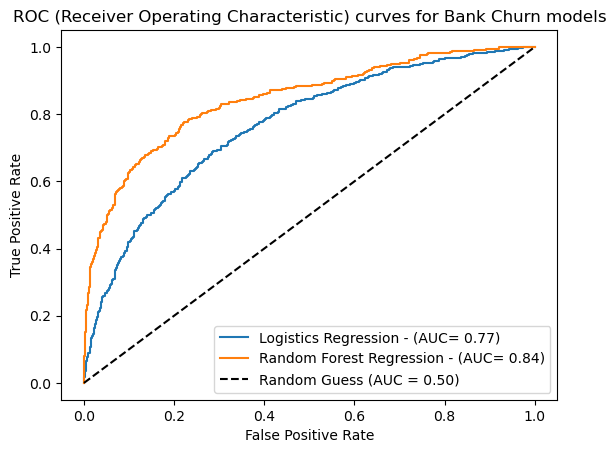

In [58]:
# Plot the AUC curve
plt.plot(fpr1, tpr1, label=f"Logistics Regression - (AUC= {auc_score1:.2f})")
plt.plot(fpr2, tpr2, label=f"Random Forest Regression - (AUC= {auc_score2:.2f})")

# Draw random guess
plt.plot([0,1], [0,1], "k--", label="Random Guess (AUC = 0.50)")

# Format visual
plt.title("ROC (Receiver Operating Characteristic) curves for Bank Churn models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show();

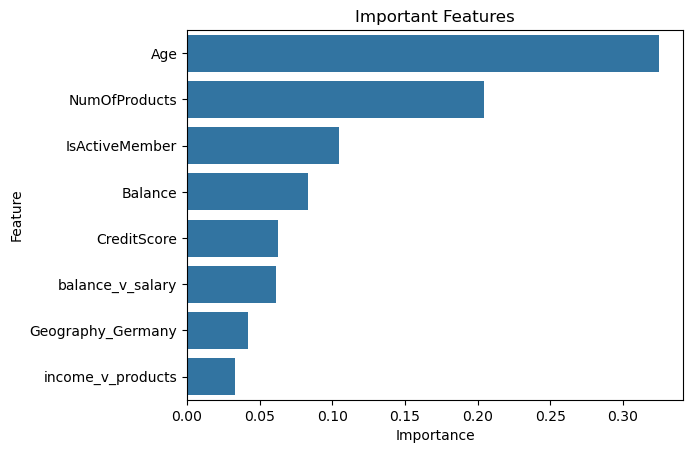

In [59]:
# Define and plot the importance features

# Define a threshold for feature importance
threshold = 0.03  # Want features with an importance score >= 0.3

# Create a DataFrame with feature importances and column names
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Filter features based on the threshold
important_features = feature_importances[feature_importances['Importance'] >= threshold]

# Sort features by importance for better visualization
important_features = important_features.sort_values(by='Importance', ascending=False)

# Plot the important features
sns.barplot(x='Importance', y='Feature', data=important_features)
plt.title('Important Features')
plt.show()